# Advanced Diabetes Regression Exercise (Upgraded Version)

This notebook now includes hyperparameter tuning for Gradient Boosting and Random Forest, improved feature explanations, and a final model comparison table.


In [6]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='disease_progression')

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## Exploratory Data Analysis

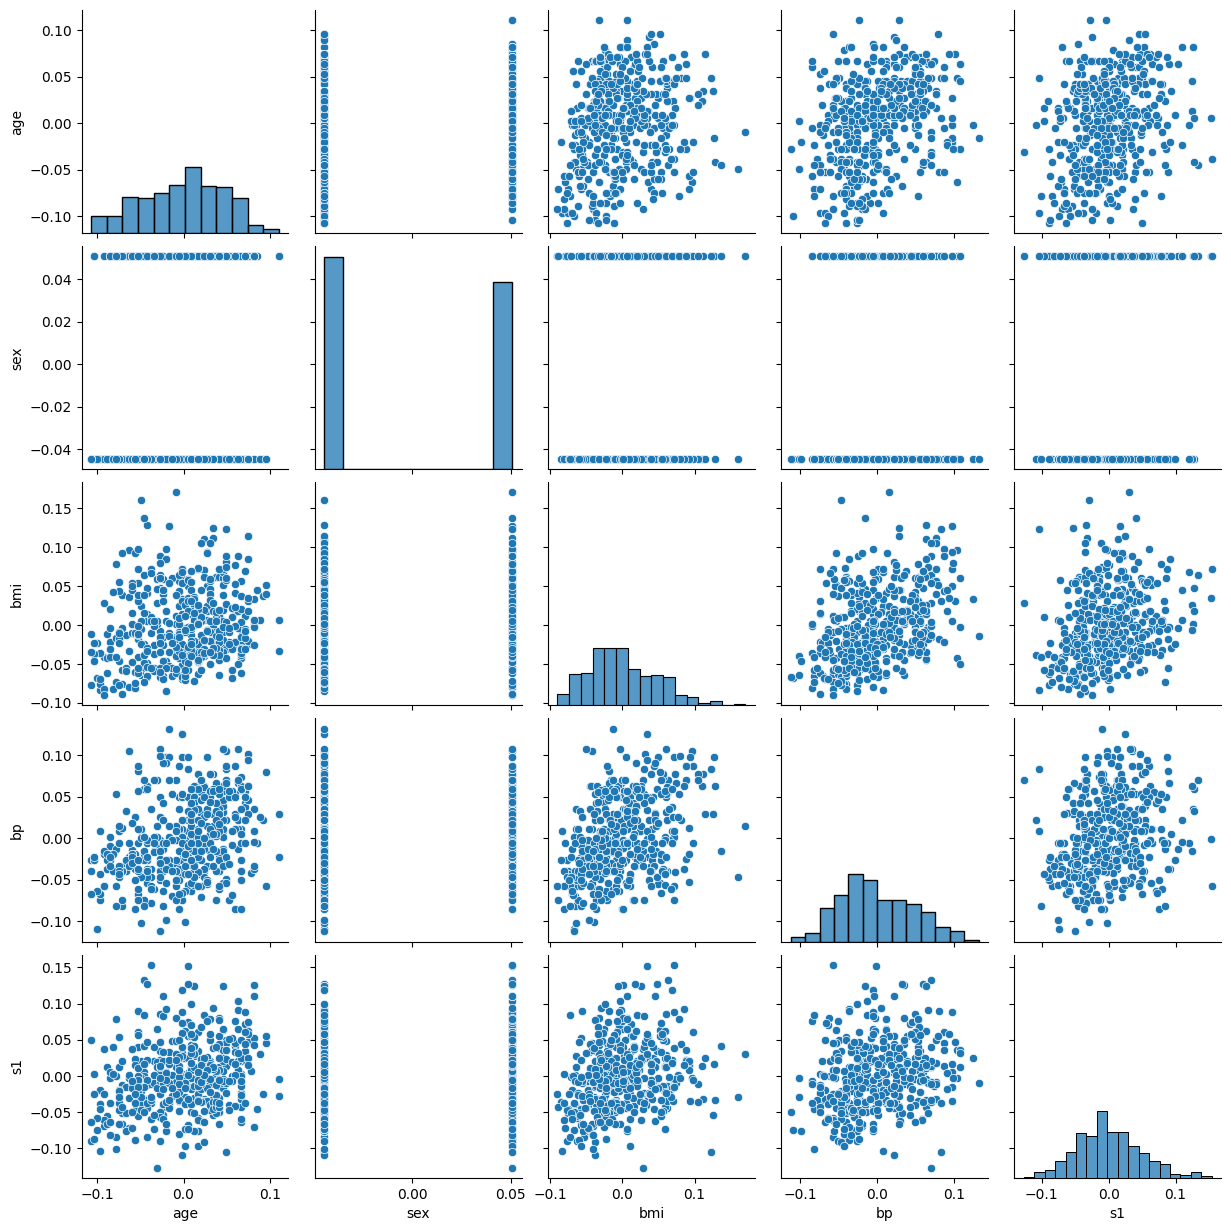

In [7]:
sns.pairplot(X.iloc[:,:5])
plt.show()

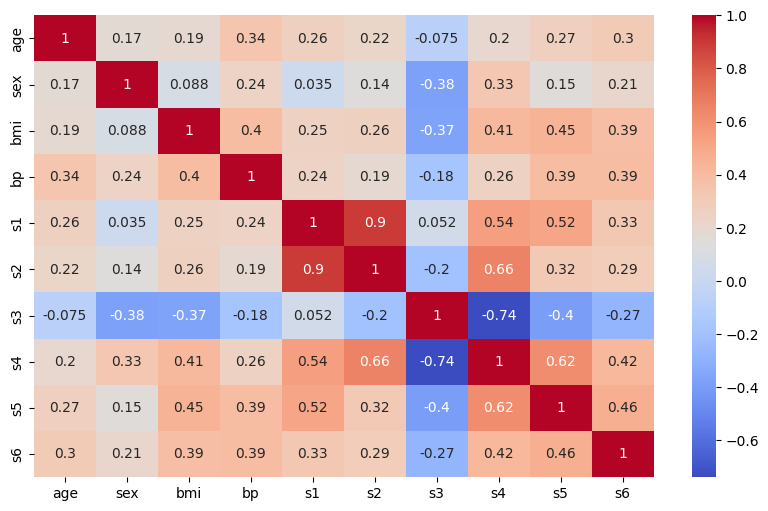

In [8]:
corr = X.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Train/Test Split & Baseline Models

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

for name, model in base_models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, "R²:", round(r2_score(y_test, pred), 3))

LinearRegression R²: 0.453
RandomForest R²: 0.443
GradientBoosting R²: 0.453


## Hyperparameter Tuning (Upgrade Step)

In [10]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4]
}

grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
tuned_pred = best_model.predict(X_test)
print("Best Params:", grid.best_params_)
print("Tuned Model R²:", round(r2_score(y_test, tuned_pred), 3))

Best Params: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
Tuned Model R²: 0.486


## Final Comparison

In [11]:
results = {}

for name, model in base_models.items():
    model.fit(X_train, y_train)
    results[name] = r2_score(y_test, model.predict(X_test))

results["Tuned Gradient Boosting"] = r2_score(y_test, tuned_pred)

pd.DataFrame.from_dict(results, orient='index', columns=['R²']).sort_values('R²', ascending=False)

,R²
Tuned Gradient Boosting,0.485709
GradientBoosting,0.452934
LinearRegression,0.452603
RandomForest,0.442823
